# (Flight analysis)
## by Mahmoud Zaher

#  Main reasons for flight cancelations and delays  ?

When we hear about flight delay or cancellation the first thing we think about is weather or security reasons , in this data set we explore more about that and if what we mean by bad weather winter only or winter and summer .


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

df = pd.read_csv("data/airline_delay_causes.csv")
df = df.drop('Unnamed: 21',axis=1)
df = df.dropna()
df.rename(columns={' month':'month'},inplace = True)
a = df['airport_name'].str.split(',').str[-1]
df['city'] = a.str.split(':').str[0]


# Which holiday month (July, November, or December) is the worst for travel?


we can see that june and may have less number of flights compared to any other month and also july and august have large number of flights so I think you should chose june or july as ticket's may be cheap . 

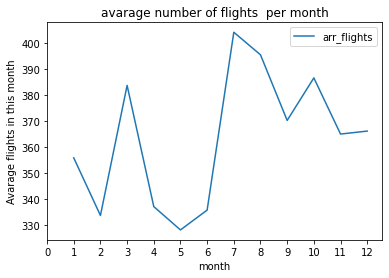

In [2]:
df_month = df.groupby('month' )['arr_flights'].mean().reset_index()
df_month.plot(x='month', y='arr_flights' )
plt.xticks(list(range(0,13,1)))
plt.ylabel("Avarage flights in this month")
plt.title("avarage number of flights  per month")
plt.show()

# what's the month that have bad weather delay ? 
if we decided to chose june or jully as the past graph suggest we should put in our consideration that our flight may have more delay than other months as weather in june and jully have more delay compared to other months 

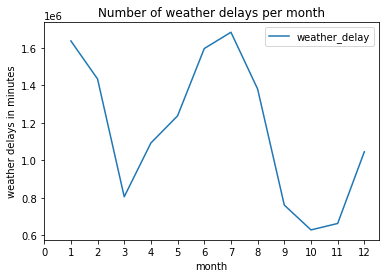

In [3]:
df_weather = df[['month', 'weather_delay']].groupby('month').sum().reset_index()
df_weather.plot(x='month', y='weather_delay' )
plt.xticks(list(range(0,13,1)))
plt.ylabel("weather delays in minutes")
plt.title("Number of weather delays per month")
plt.show()

# what is the most reasons that lead to cancel ? 

from the graph we can see that late aircraft has the bigger value than other reasons , and that happen when we have problem with flight that affect unfortionelty other flights 

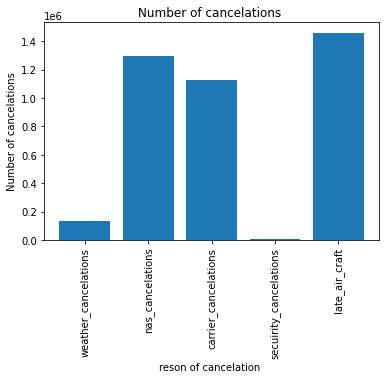

In [4]:
weth_ct_sum= df[' weather_ct'].sum()

nas_ct_sum= df['nas_ct'].sum()

carrier_ct_sum= df['carrier_ct'].sum()

secuirity_ct_sum =df['security_ct'].sum()

late_aircraft_sum = df['late_aircraft_ct'].sum()


X = ['weather_cancelations','nas_cancelations', 'carrier_cancelations', 'secuirity_cancelations','late_air_craft']
Y = [weth_ct_sum,nas_ct_sum,carrier_ct_sum, secuirity_ct_sum,late_aircraft_sum]
plt.bar(X,Y)
plt.ylabel('Number of cancelations')
plt.title('Number of cancelations ')
plt.xlabel('reson of cancelation ')
plt.xticks(rotation=90)
plt.show()

# Which is the worst airport in dealing with bad weather ? 

we can see that ORD(Chicago, IL: Chicago O'Hare International) and ATL (Atlanta, GA: Hartsfield-Jackson Atlanta Intern)is the biggest to have affect of bad weather , it may not be related of bad dealing with bad weather and may be this high delay time due to bad weather of country , but on my point of view it's not recommended to go to this airports . 

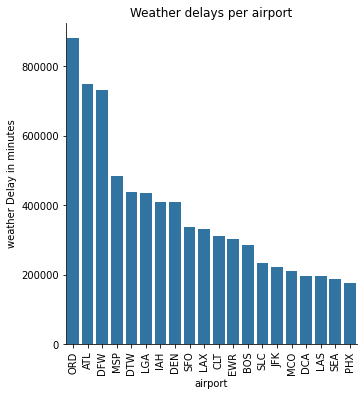

In [5]:


airport_delays = df[['airport','weather_delay']].groupby('airport').sum().reset_index().sort_values('weather_delay',ascending=False)

airport_delays = airport_delays.iloc[:20]

airport_delays = pd.melt(airport_delays, id_vars='airport', value_vars=['weather_delay'])


color = sn.color_palette()[0]
sn.factorplot(x='airport', y='value', data=airport_delays, kind='bar' , color = color)
plt.xticks(rotation=90)
plt.ylabel('weather Delay in minutes')
plt.title('Weather delays per airport')
plt.show()

# what's worst carrier in dealing with delayed time due to security ? 
here also we can see that wn(Southwest Airlines Co.) and AA (American Airlines Inc)is the most the have delay time in security , as i think that that's not bad as security is a good thing to wait for . 

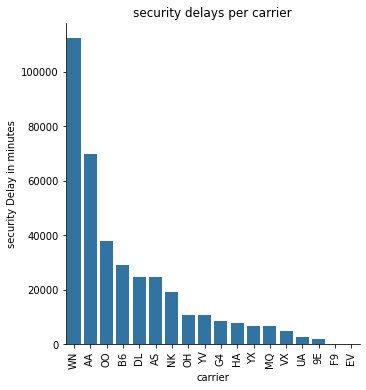

In [6]:

carrier_delays = df[['carrier','security_delay']].groupby('carrier').sum().reset_index().sort_values('security_delay',ascending=False)

carrier_delays = carrier_delays.iloc[:20]

carrier_delays = pd.melt(carrier_delays, id_vars='carrier', value_vars=['security_delay'])


color = sn.color_palette()[0]
sn.factorplot(x='carrier', y='value', data=carrier_delays, kind='bar' , color = color)
plt.xticks(rotation=90)
plt.ylabel('security Delay in minutes')
plt.title('security delays per carrier')
plt.show()

# Conclusion

* chosing the best month for a trip is not easy as we saw before we might get cheap ticket , but we may have high probability of delay or cancelation . 
* weather affects appear in both summer and winter . 
* any issue with a flight affect other flights and may cause a lot of delay . 
